
# Exploratory Data Analysis (EDA) Happinesss

Loading the data frame

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/prisc/Desktop/ejercicios python/Northumbria/datasets/happiness.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data cleaning

In [2]:
df.isna().sum()/df.shape[0]*100

Country or region               0.0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: float64

Since there are not missing values proceed to the next step

## 2. Data preparation

In [3]:
#remove trivial or redundant features
df=df.drop(columns=['Country or region'])
df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## 3. Exploratory Data Analysis

### 3.1. Measure of central tendency 

In [9]:
df.mean()

Score                           5.407096
GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

In [10]:
df.median()

Score                           5.3795
GDP per capita                  0.9600
Social support                  1.2715
Healthy life expectancy         0.7890
Freedom to make life choices    0.4170
Generosity                      0.1775
Perceptions of corruption       0.0855
dtype: float64

In [11]:
df.mode()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5.208,0.96,1.465,0.815,0.498,0.153,0.028
1,NaN,NaN,NaN,0.999,0.508,NaN,0.078
2,NaN,NaN,NaN,NaN,0.557,NaN,0.089


### 3.2. Shape of the distributions

In [12]:
df.skew()

Score                           0.011450
GDP per capita                 -0.385232
Social support                 -1.134728
Healthy life expectancy        -0.613841
Freedom to make life choices   -0.685636
Generosity                      0.745942
Perceptions of corruption       1.650410
dtype: float64

Skewness is a measure that represents the lack of symmetry

Positively/right skewed distributions: 
* tail on the right side longer than left
* mean pulled toward the right tail (median < mean)

Negatively/left skewed distributions:
* tail on the left side longer than left
* mean pulled toward the left tail (median < mean)

When skewed distribution,prefer meadian as measure of central tendency

In [13]:
df.kurt()

Score                          -0.608375
GDP per capita                 -0.769902
Social support                  1.229005
Healthy life expectancy        -0.302895
Freedom to make life choices   -0.068857
Generosity                      1.173189
Perceptions of corruption       2.416824
dtype: float64

kurtosis is the degree of peakedness of a distribution

mesokurtic
* normal distribution 
* kurtosis= 3

Leptokurtic (+)
* higher peak than normal distribution
* heavier tails
* high probability of extreme events

Platykurtic (-)
* lower peak than normal distribution
* lighter tails 
* low probability of extreme events

### 3.3. Univariate EDA
#### 3.3.1. GDP per Capita

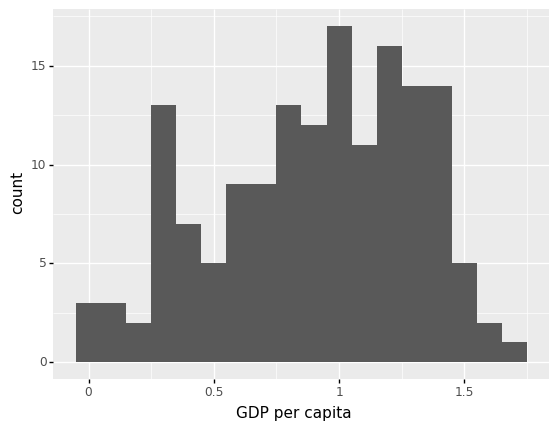

<ggplot: (167542463594)>

In [8]:
# Option 1
from plotnine import*
ggplot(data=df)+geom_histogram(mapping=aes(x='GDP per capita'),binwidth=0.1)

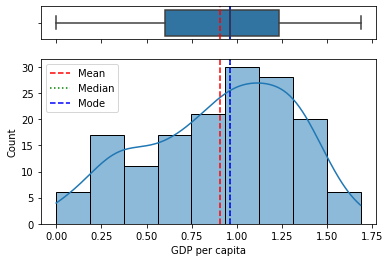

In [34]:
#Option 2 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {'height_ratios': (1,5)})
mean=df['GDP per capita'].mean()
median=df['GDP per capita'].median()
mode=df['GDP per capita'].mode().values[0]

sns.boxplot(data=df, x='GDP per capita', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x='GDP per capita', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean')
ax_hist.axvline(median, color='g', linestyle='dotted', label='Median')
ax_hist.axvline(mode, color='b', linestyle='--', label='Mode')
ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

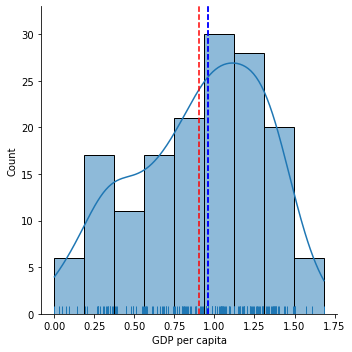

In [56]:
# Option 3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.displot(df['GDP per capita'], kde=True, rug=True);
plt.axvline(np.median(df['GDP per capita']),color='b', linestyle='--')
plt.axvline(np.mean(df['GDP per capita']),color='r', linestyle='--')
plt.axvline((df['GDP per capita'].mode().values[0]), color='b', linestyle='--')

In [49]:
from scipy import stats
stats.mode(df['GDP per capita'])
#numpy does not have stats for mode so use scipy

ModeResult(mode=array([0.96]), count=array([3]))

### 3.3.2. Generosity

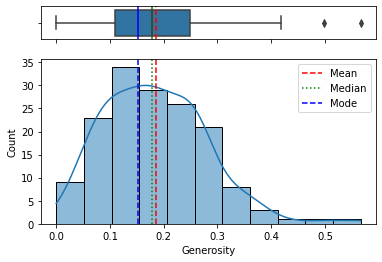

In [57]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {'height_ratios': (1,5)})
mean=df['Generosity'].mean()
median=df['Generosity'].median()
mode=df['Generosity'].mode().values[0]

sns.boxplot(data=df, x='Generosity', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x='Generosity', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean')
ax_hist.axvline(median, color='g', linestyle='dotted', label='Median')
ax_hist.axvline(mode, color='b', linestyle='--', label='Mode')
ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

### 3.3.3. Healthy life expectancy

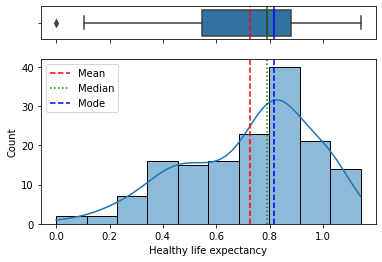

In [58]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {'height_ratios': (1,5)})
mean=df['Healthy life expectancy'].mean()
median=df['Healthy life expectancy'].median()
mode=df['Healthy life expectancy'].mode().values[0]

sns.boxplot(data=df, x='Healthy life expectancy', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x='Healthy life expectancy', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean')
ax_hist.axvline(median, color='g', linestyle='dotted', label='Median')
ax_hist.axvline(mode, color='b', linestyle='--', label='Mode')
ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

### 3.3.4. Perceptions of corruption

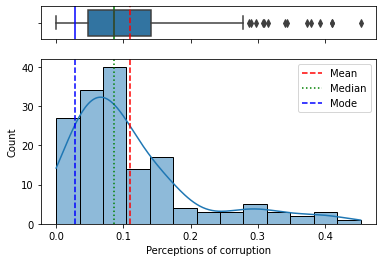

In [59]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {'height_ratios': (1,5)})
mean=df['Perceptions of corruption'].mean()
median=df['Perceptions of corruption'].median()
mode=df['Perceptions of corruption'].mode().values[0]

sns.boxplot(data=df, x='Perceptions of corruption', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x='Perceptions of corruption', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label='Mean')
ax_hist.axvline(median, color='g', linestyle='dotted', label='Median')
ax_hist.axvline(mode, color='b', linestyle='--', label='Mode')
ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

## 3.4. Pearson Correlation

Dealing with numerical data, therefore there is not need to transform the data

In [60]:
corr=df.corr(method='pearson')
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


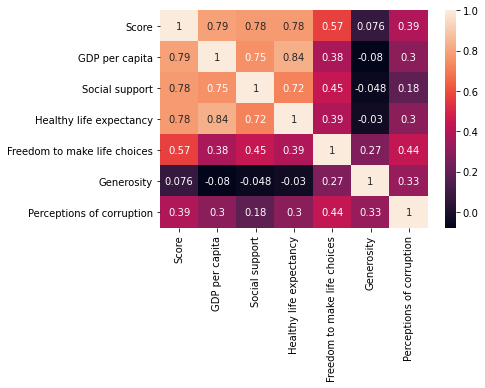

In [61]:
heatmap = sns.heatmap(corr, annot=True)

In [65]:
df[df.duplicated()]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
